In [7]:
import sys
sys.path.append('/Users/adamdvorak/Ematiq/nba-data-project')
import os

from analysis2.src.data_loader import load_player_ids
from analysis2.src.minute_model import combine_player_data, predict_player_stats, generate_graphs


DATA_DIR = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/database'
RESULTS_FILE = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/results/predicted_vs_actual.csv'
RMSE_FILE = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/results/rmse_values.json'

# Ensure the file path is correct
player_ids_file = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/nba_players_w_id.txt'
if not os.path.isfile(player_ids_file):
    raise FileNotFoundError(f"The file {player_ids_file} does not exist.")

player_ids = load_player_ids(player_ids_file)  # {player_id: player_name}
print(f"Loaded {len(player_ids)} player IDs.")

# Fix: Ensure load_player_data correctly handles player_ids
all_data = combine_player_data(player_ids, DATA_DIR)
print(f"Loaded data for {len(all_data)} players.")

Loaded 457 player IDs.
Loading data for player: Precious Achiuwa (ID: achiupr01)
Data loaded and appended for player: Precious Achiuwa
Loading data for player: Steven Adams (ID: adamsst01)
Data loaded and appended for player: Steven Adams
Loading data for player: Bam Adebayo (ID: adebaba01)
Data loaded and appended for player: Bam Adebayo
Loading data for player: Ochai Agbaji (ID: agbajoc01)
File not found: /Users/adamdvorak/Ematiq/nba-data-project/analysis2/database/agbajoc01/agbajoc01_22.csv. Skipping this season.
Data loaded and appended for player: Ochai Agbaji
Loading data for player: Santi Aldama (ID: aldamsa01)
Data loaded and appended for player: Santi Aldama
Loading data for player: Nickeil Alexander-Walker (ID: alexani01)
Data loaded and appended for player: Nickeil Alexander-Walker
Loading data for player: Grayson Allen (ID: allengr01)
Data loaded and appended for player: Grayson Allen
Loading data for player: Jarrett Allen (ID: allenja01)
Data loaded and appended for player

In [8]:
import json
results_dir = '/Users/adamdvorak/Ematiq/nba-data-project/analysis2/results'

# Predict the stats for each player
results_df, rmse_data = predict_player_stats(all_data)

# Save the results to a CSV file
results_df.to_csv(RESULTS_FILE, index=False)
print(f"Results saved to {RESULTS_FILE}")

# Save the RMSE values to a JSON file
with open(RMSE_FILE, 'w') as rmse_file:
    json.dump(rmse_data, rmse_file, indent=4)
print(f"RMSE values saved to {RMSE_FILE}")

Results saved to /Users/adamdvorak/Ematiq/nba-data-project/analysis2/results/predicted_vs_actual.csv
RMSE values saved to /Users/adamdvorak/Ematiq/nba-data-project/analysis2/results/rmse_values.json


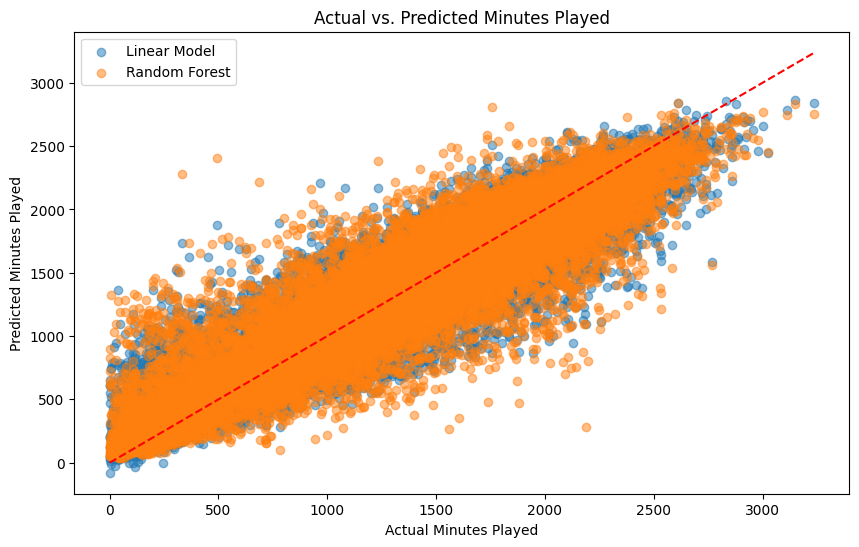

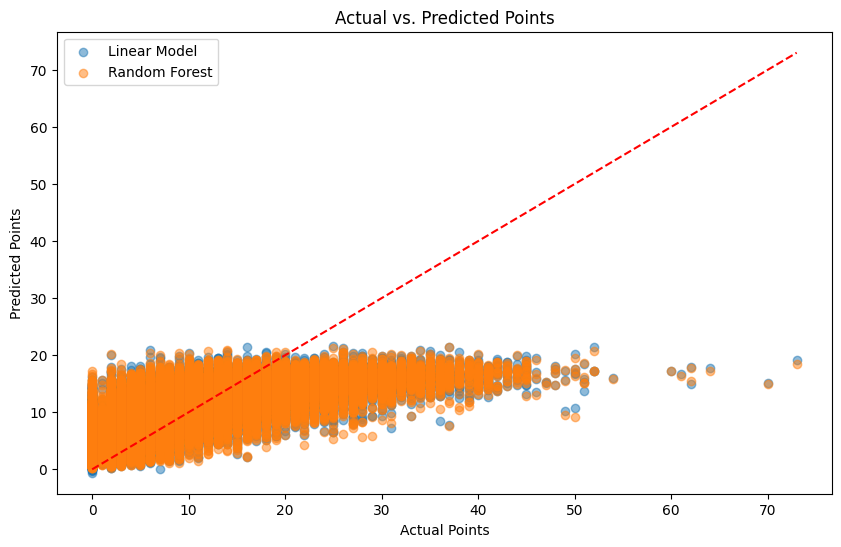

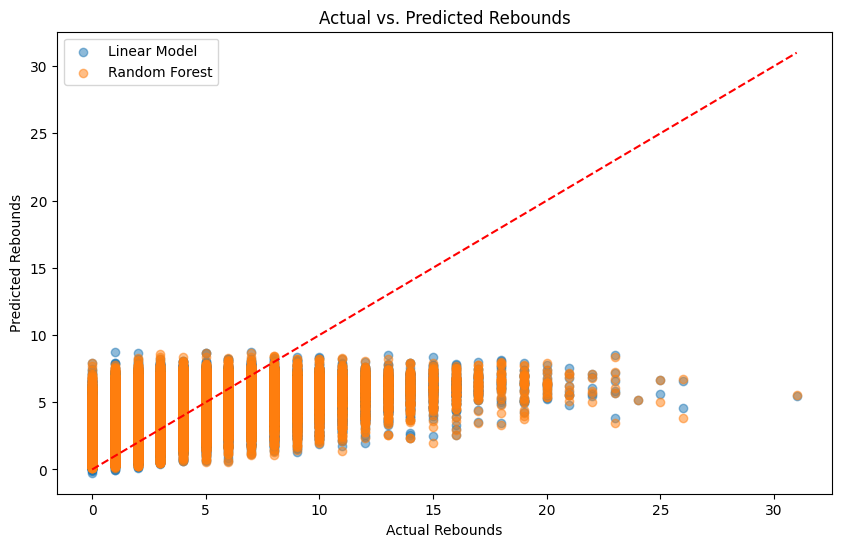

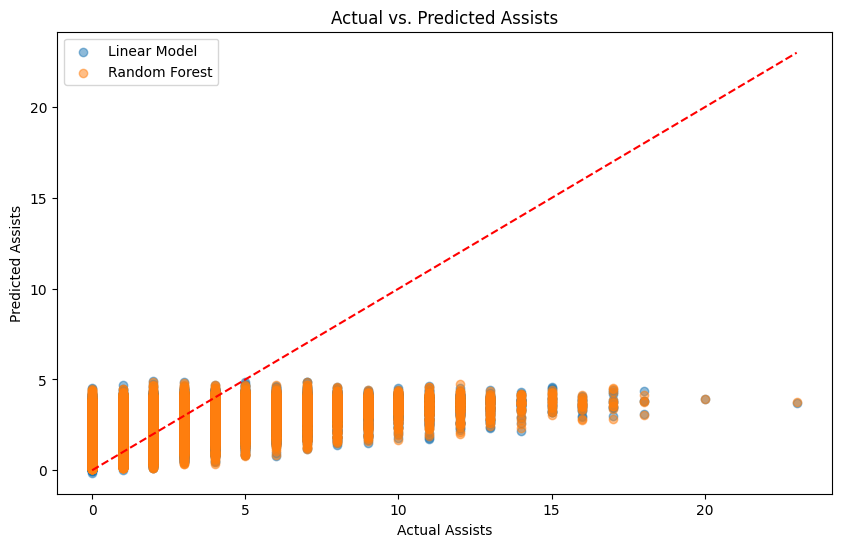

In [14]:
generate_graphs(results_df)